# Importing all Relevant Libraries

In [2]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
loan=pd.read_csv('C:/Users/Arvind/UpGrad-Python Basics/DS in Python Part1/DS in Python Part1/EDA/Gramener EDA case study/loan.csv')


C:\Users\Arvind\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Data Understanding

In [7]:
loan.head()

loan.info()

loan.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

# Data Cleaning

In [109]:
# summarising number of missing values in each column by it's percentage
round(loan.isnull().sum()/len(loan.index)*100,2)

id                            0.00
member_id                     0.00
loan_amnt                     0.00
funded_amnt                   0.00
funded_amnt_inv               0.00
term                          0.00
int_rate                      0.00
installment                   0.00
grade                         0.00
sub_grade                     0.00
emp_title                     6.19
emp_length                    0.00
home_ownership                0.00
annual_inc                    0.00
verification_status           0.00
issue_d                       0.00
loan_status                   0.00
pymnt_plan                    0.00
url                           0.00
purpose                       0.00
title                         0.03
zip_code                      0.00
addr_state                    0.00
dti                           0.00
delinq_2yrs                   0.00
earliest_cr_line              0.00
inq_last_6mths                0.00
open_acc                      0.00
pub_rec             

In [13]:
# removing the columns having more than 90% missing values
loan=loan.dropna(axis=1,how='all')

In [14]:
print(loan.shape)

(39717, 57)


In [15]:
# summarising number of missing values in each column by it's percentage
round(loan.isnull().sum()/len(loan.index)*100,2)

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     0.00
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.58
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

In [16]:
# There are now 2 columns having approx 32 and 64% missing values - 
# description, months since last delinquent,mths_since_last_delinq,mths_since_last_record,next_pymnt_d

# Dropping these Columns

loan=loan.drop(['mths_since_last_record','next_pymnt_d','desc','mths_since_last_delinq'],axis=1)


In [17]:
# summarising number of missing values in each column by it's percentage
round(loan.isnull().sum()/len(loan.index)*100,2)

id                            0.00
member_id                     0.00
loan_amnt                     0.00
funded_amnt                   0.00
funded_amnt_inv               0.00
term                          0.00
int_rate                      0.00
installment                   0.00
grade                         0.00
sub_grade                     0.00
emp_title                     6.19
emp_length                    0.00
home_ownership                0.00
annual_inc                    0.00
verification_status           0.00
issue_d                       0.00
loan_status                   0.00
pymnt_plan                    0.00
url                           0.00
purpose                       0.00
title                         0.03
zip_code                      0.00
addr_state                    0.00
dti                           0.00
delinq_2yrs                   0.00
earliest_cr_line              0.00
inq_last_6mths                0.00
open_acc                      0.00
pub_rec             

We have removed the missing values from the columns though there are some more ,we can ignore them and correct them later. Now, let's check if there are missing values in the rows. 

i.e Do we have rows with say more than 5 columns missing

In [29]:
#Checks null fields for every row
loan.isnull().sum(axis=1)>5

# There are no rows with more than 5 columns empty, so we can proceed
loan.loc[(loan.isnull().sum(axis=1)>5),:]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens


Checking column data types and if their formats are inplace

In [31]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
id                            39717 non-null int64
member_id                     39717 non-null int64
loan_amnt                     39717 non-null int64
funded_amnt                   39717 non-null int64
funded_amnt_inv               39717 non-null float64
term                          39717 non-null object
int_rate                      39717 non-null object
installment                   39717 non-null float64
grade                         39717 non-null object
sub_grade                     39717 non-null object
emp_title                     37259 non-null object
emp_length                    39717 non-null object
home_ownership                39717 non-null object
annual_inc                    39717 non-null float64
verification_status           39717 non-null object
issue_d                       39717 non-null object
loan_status                   39717 non-null object
pymnt_pl

In [43]:
type('int_rate')

# The column int_rate is character type, let's convert it to float

loan['int_rate']=loan['int_rate'].apply(lambda x: pd.to_numeric(x.split('%')[0]))



'10.25'

In [40]:
# checking the data types
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
id                            39717 non-null int64
member_id                     39717 non-null int64
loan_amnt                     39717 non-null int64
funded_amnt                   39717 non-null int64
funded_amnt_inv               39717 non-null float64
term                          39717 non-null object
int_rate                      39717 non-null float64
installment                   39717 non-null float64
grade                         39717 non-null object
sub_grade                     39717 non-null object
emp_title                     37259 non-null object
emp_length                    39717 non-null object
home_ownership                39717 non-null object
annual_inc                    39717 non-null float64
verification_status           39717 non-null object
issue_d                       39717 non-null object
loan_status                   39717 non-null object
pymnt_p

In [123]:
# also, lets extract the numeric part from the variable employment length

# first, let's drop the missing values from the column (otherwise the regex code below throws error)
loan = loan[~loan['emp_length'].isnull()]

# using regular expression to extract numeric values from the string
import re
loan['emp_length'] = df['emp_length'].apply(lambda x: re.findall(r'\d+', str(x)))

# Data Analysis


The variables in the loan prediction data set can be grouped into 3 buckets
- Customer behavioral variable
- Loan variables
- demographic variables

Now, the customer behaviour variables are not available at the time of loan application, and thus they cannot be used as predictors for credit approval. 
Thus, going forward, we will use only the other two types of variables.

In [131]:
behaviour_var =  [
  "delinq_2yrs",
  "earliest_cr_line",
  "inq_last_6mths",
  "open_acc",
  "pub_rec",
  "revol_bal",
  "revol_util",
  "total_acc",
  "out_prncp",
  "out_prncp_inv",
  "total_pymnt",
  "total_pymnt_inv",
  "total_rec_prncp",
  "total_rec_int",
  "total_rec_late_fee",
  "recoveries",
  "collection_recovery_fee",
  "last_pymnt_d",
  "last_pymnt_amnt",
  "last_credit_pull_d",
  "application_type"]
behaviour_var

['delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'last_credit_pull_d',
 'application_type']

In [132]:
df = loan.drop(behaviour_var, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39717 entries, 0 to 39716
Data columns (total 32 columns):
id                            39717 non-null int64
member_id                     39717 non-null int64
loan_amnt                     39717 non-null int64
funded_amnt                   39717 non-null int64
funded_amnt_inv               39717 non-null float64
term                          39717 non-null object
int_rate                      39717 non-null float64
installment                   39717 non-null float64
grade                         39717 non-null object
sub_grade                     39717 non-null object
emp_title                     37259 non-null object
emp_length                    39717 non-null object
home_ownership                39717 non-null object
annual_inc                    39717 non-null float64
verification_status           39717 non-null object
issue_d                       39717 non-null object
loan_status                   39717 non-null object
pymnt_p

In [133]:
# also, we will not be able to use the variables zip code, address, state etc.
# the variable 'title' is derived from the variable 'purpose'
# thus let get rid of all these variables as well

df = df.drop(['title', 'url', 'zip_code', 'addr_state'], axis=1)


Next, let's have a look at the target variable - loan_status. We need to relabel the values to a binary form - 0 or 1, 1 indicating that the person has defaulted and 0 otherwise.

In [138]:
# filtering only fully paid or charged-off
df = df[df['loan_status'] != 'Current']
df['loan_status'] = df['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1)

# converting loan_status to integer type
df['loan_status'] = df['loan_status'].apply(lambda x: pd.to_numeric(x))

# summarising the values
df['loan_status'].value_counts()

0    32950
1     5627
Name: loan_status, dtype: int64

In [140]:
df['loan_status']

0        0
1        1
2        0
3        0
5        0
6        0
7        0
8        1
9        1
10       0
11       0
12       1
13       0
14       1
15       0
16       0
17       0
18       0
19       0
20       0
21       1
22       0
23       0
24       1
25       0
26       1
27       1
28       0
29       0
30       0
        ..
39687    0
39688    1
39689    0
39690    0
39691    0
39692    0
39693    0
39694    0
39695    0
39696    0
39697    0
39698    0
39699    0
39700    0
39701    0
39702    0
39703    0
39704    0
39705    0
39706    0
39707    0
39708    0
39709    0
39710    0
39711    0
39712    0
39713    0
39714    0
39715    0
39716    0
Name: loan_status, Length: 38577, dtype: int64

# Univariate Analysis

In [142]:
np.mean(df['loan_status']) # This works because we have defaulters set as 1

0.14586411592399617

### Let us visualize the average degault rates across other categorical variables

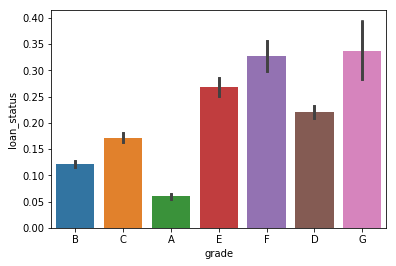

In [145]:
sns.barplot(x='grade',y='loan_status',data=df)
plt.show()

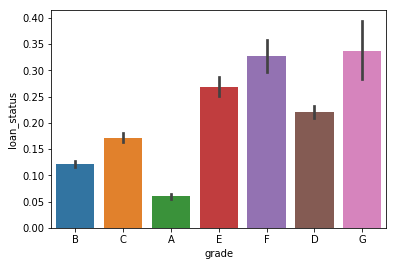

In [155]:
#DEfining a Function to do the dorty work

def bar_plot(cat_var):
    sns.barplot(x=cat_var,y='loan_status',data=df)
    plt.show()
    

bar_plot('grade')

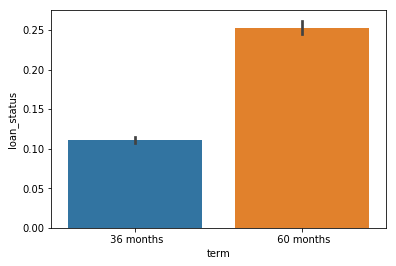

In [156]:
bar_plot('term')

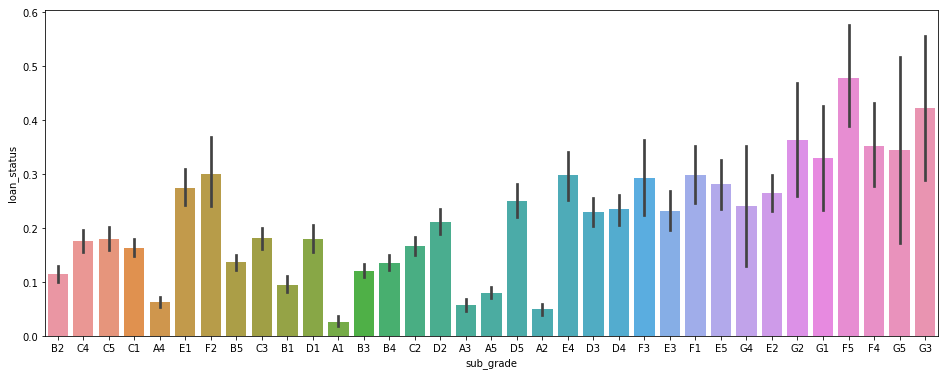

In [160]:
plt.figure(figsize=(16, 6)
bar_plot('sub_grade')

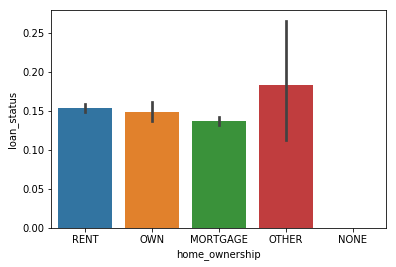

In [162]:
bar_plot('home_ownership')

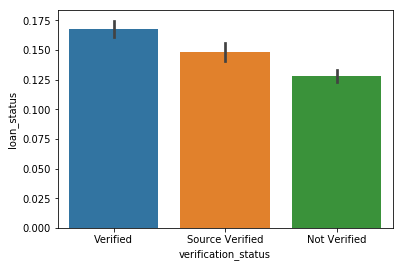

In [163]:
bar_plot('verification_status')

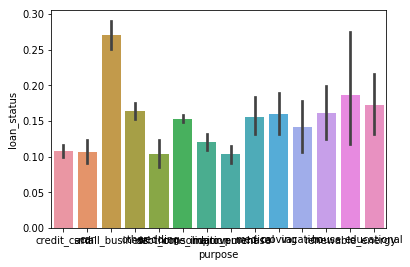

In [164]:
bar_plot('purpose')

In [166]:
# SORTING OUT THE DATE [ISSUE_D] FIELD AND SPLITTING OUT THE YEAR-------------
import datetime as dt
import pandas as pd

type('issue_d')

loan['issue_d'].unique()

loan['issue_d']=pd.to_datetime(loan['issue_d'],format="%b-%y")  # You need to know the format to convert to the respective timestamps,
# The best source for this I found is - https://stackabuse.com/how-to-format-dates-in-python/

loan['year']=loan['issue_d'].dt.year
loan['month']=loan['issue_d'].dt.month


In [167]:
# let's first observe the number of loans granted across years
df.groupby('year').year.count()

year
2007      251
2008     1562
2009     4716
2010    11532
2011    20516
Name: year, dtype: int64

You can see that the number of loans has increased steadily across years. 

In [168]:
# number of loans across months
df.groupby('month').month.count()

month
1     2379
2     2358
3     2691
4     2831
5     2919
6     3180
7     3351
8     3388
9     3498
10    3761
11    4006
12    4215
Name: month, dtype: int64

Most loans are granted in December, and in general in the latter half of the year.

# DEfault Rates Across Year

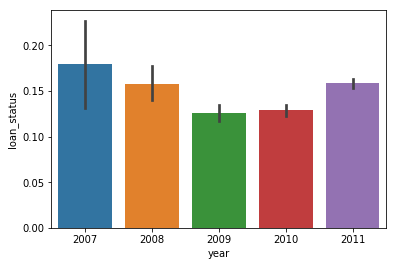

In [169]:
bar_plot('year')

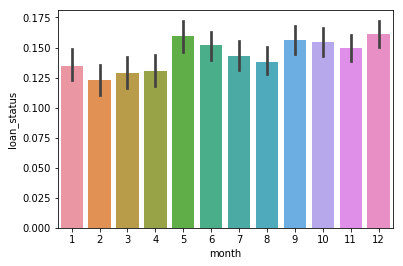

In [170]:
bar_plot('month')

# Default Rate Vs Continuous Variables

TypeError: '>' not supported between instances of 'int' and 'str'

In [174]:
df['emp_length'].unique

<bound method Series.unique of 0        [10]
1         [1]
2        [10]
3        [10]
5         [3]
6         [8]
7         [9]
8         [4]
9         [1]
10        [5]
11       [10]
12        [1]
13        [3]
14        [3]
15        [1]
16        [4]
17       [10]
18        [1]
19        [6]
20        [3]
21       [10]
22       [10]
23        [5]
24        [1]
25        [2]
26        [9]
27        [2]
28       [10]
29        [1]
30        [7]
         ... 
39687     [9]
39688     [6]
39689     [1]
39690     [3]
39691     [1]
39692     [1]
39693     [1]
39694     [8]
39695     [7]
39696     [2]
39697     [1]
39698     [1]
39699     [4]
39700     [1]
39701     [7]
39702     [1]
39703     [2]
39704     [1]
39705     [8]
39706     [1]
39707     [2]
39708     [4]
39709     [1]
39710     [1]
39711     [5]
39712     [4]
39713     [3]
39714     [1]
39715     [1]
39716     [1]
Name: emp_length, Length: 38577, dtype: object>